In [1]:
import pandas as pd
import numpy as np
#import pandas_profiling as pp

# Data preprocessors
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA


# Model Imports
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

# trees
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from  sklearn.neural_network import MLPClassifier 

import xgboost as xgb
#metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support as metrics_matrix
from sklearn.metrics import roc_auc_score as auc_score

# plotting tools
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Neural Network Library imports
import torch

import torch.nn as nn
import torch.functional as f

In [3]:
!nvidia-smi

Fri Dec  9 17:30:21 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 516.59       Driver Version: 516.59       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  ERR!               WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A    0C    P3    N/A /  N/A |      0MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
print(f'Cuda available : {torch.cuda.is_available()}')
print(f'device name : {torch.cuda.get_device_name()} ')

Cuda available : True
device name : NVIDIA GeForce RTX 3050 Laptop GPU 


In [4]:
# loading the Dataset :

Train_Data = pd.read_csv('TrainingData.csv')
Test_Data = pd.read_csv('testX.csv')

# We won't Touch the Train_Data and Test_Data ; but we will copy the data in a new variable for our usage

train_df = Train_Data.copy()
test_df = Test_Data.copy()


C:\Users\pcdpm\AppData\Local\Temp\ipykernel_16392\2539679583.py:3: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  Train_Data = pd.read_csv('TrainingData.csv')
C:\Users\pcdpm\AppData\Local\Temp\ipykernel_16392\2539679583.py:4: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  Test_Data = pd.read_csv('testX.csv')


In [5]:
train_df.info() # Checking the info of the training data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83000 entries, 0 to 82999
Data columns (total 53 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   application_key  83000 non-null  int64  
 1   mvar1            83000 non-null  object 
 2   mvar2            77114 non-null  float64
 3   mvar3            82465 non-null  float64
 4   mvar4            82465 non-null  float64
 5   mvar5            82465 non-null  float64
 6   mvar6            83000 non-null  object 
 7   mvar7            83000 non-null  object 
 8   mvar8            83000 non-null  object 
 9   mvar9            83000 non-null  object 
 10  mvar10           83000 non-null  object 
 11  mvar11           83000 non-null  object 
 12  mvar12           83000 non-null  object 
 13  mvar13           83000 non-null  object 
 14  mvar14           83000 non-null  int64  
 15  mvar15           83000 non-null  object 
 16  mvar16           83000 non-null  object 
 17  mvar17      

In [6]:
# Preprocessing the Dataset 
# In Every column except column of var-47 all have numerical values ; so other than numerical values are considered as nan

def is_float(x):
    try:
        float(x)
        return True
    except:
        return False

def change_columns(df):

    columns_list = df.columns.values.tolist() # it will output the list of all columns

    for i in columns_list : # Iterate through each column and it will change each column to 'nan' if it is not a number
        if i != 'mvar47':
            df[i] = df[i].apply( lambda x: float(str(x)) if ( isinstance(x,(float,int)) or str(x).isnumeric() or is_float(x) ) else np.nan )
        else:
            df[i] = df[i].apply( lambda x: ['C','L'].index(x) if x in ['C','L'] else np.nan )
    return df

transformed_train_df = change_columns(train_df)
transformed_test_df = change_columns(test_df)

In [8]:
transformed_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83000 entries, 0 to 82999
Data columns (total 53 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   application_key  83000 non-null  float64
 1   mvar1            79267 non-null  float64
 2   mvar2            77114 non-null  float64
 3   mvar3            82465 non-null  float64
 4   mvar4            82465 non-null  float64
 5   mvar5            82465 non-null  float64
 6   mvar6            63299 non-null  float64
 7   mvar7            75326 non-null  float64
 8   mvar8            63291 non-null  float64
 9   mvar9            71318 non-null  float64
 10  mvar10           82465 non-null  float64
 11  mvar11           36283 non-null  float64
 12  mvar12           68422 non-null  float64
 13  mvar13           73311 non-null  float64
 14  mvar14           83000 non-null  float64
 15  mvar15           49481 non-null  float64
 16  mvar16           63757 non-null  float64
 17  mvar17      

In [7]:
transformed_train_df # to have a look
transformed_train_df['mvar40'].isnull().sum()

65070

In [8]:
most_null_vals = np.array(list( [i,transformed_train_df[i].isnull().sum()] for i in transformed_train_df.columns if transformed_train_df[i].isnull().sum() > 20000))
print(most_null_vals)
transformed_train_df.isna().sum() 

[['mvar11' '46717']
 ['mvar15' '33519']
 ['mvar21' '23462']
 ['mvar22' '30668']
 ['mvar23' '42311']
 ['mvar30' '37988']
 ['mvar31' '58539']
 ['mvar35' '34868']
 ['mvar40' '65070']
 ['mvar41' '57264']
 ['mvar45' '45920']
 ['mvar46' '23603']]


application_key        0
mvar1               3733
mvar2               5886
mvar3                535
mvar4                535
mvar5                535
mvar6              19701
mvar7               7674
mvar8              19709
mvar9              11682
mvar10               535
mvar11             46717
mvar12             14578
mvar13              9689
mvar14                 0
mvar15             33519
mvar16             19243
mvar17             16499
mvar18             15359
mvar19                 5
mvar20               535
mvar21             23462
mvar22             30668
mvar23             42311
mvar24             19530
mvar25              7862
mvar26             10929
mvar27             13650
mvar28               535
mvar29               535
mvar30             37988
mvar31             58539
mvar32              7862
mvar33              1869
mvar34               535
mvar35             34868
mvar36              3159
mvar37              7862
mvar38               535
mvar39              6329


In [9]:
median_train = transformed_train_df.fillna( transformed_train_df.median() , inplace=False)
median_test = transformed_test_df.fillna( transformed_train_df.median() , inplace=False)

#only use this if using mode
#median_train = median_train.fillna( median_train.median() , inplace=False )#
median_test = median_test.fillna( median_train.median() , inplace=False )
#'''
max(median_train['mvar14']) # max of salary

990999999.0

In [10]:
# Newly added 
def fill_nulls(df=transformed_train_df,test_df = transformed_test_df, stats=['mode'] ):

    df_new = df.copy()
    df_test = test_df.copy()

    col_list = df.columns.values.tolist()

    for i,v in enumerate(col_list):

        if v != 'default_ind' :

            if stats[i] == 'mode' :
                df_new[v] = df[v].fillna(df[v].mode())
                df_test[v] = df_test[v].fillna(df[v].mode())
            else:
                df_new[v] = df[v].fillna(df[v].median())
                df_test[v] = df_test[v].fillna(df[v].median())

    return df_new , df_test

median_train , median_test = fill_nulls(stats=['median']*15 + ['mode']*5 + ['median']*13 + ['mode']*2 + ['median']*14 + ['mode']*3 + ['median']*4 )

In [11]:
median_train = transformed_train_df.fillna( transformed_train_df.median() , inplace=False)
median_test = transformed_test_df.fillna( transformed_train_df.median() , inplace=False)

median_train.mean()

application_key    318146.931060
mvar1                1747.308940
mvar2                   1.016392
mvar3                   5.368899
mvar4                   0.458179
mvar5                   1.077025
mvar6                1316.212494
mvar7               16538.325012
mvar8                5797.622795
mvar9               31266.100807
mvar10              30095.123904
mvar11               3451.038494
mvar12               6259.795783
mvar13              14187.679940
mvar14             189484.122530
mvar15             260773.811084
mvar16                  0.167217
mvar17                  0.201831
mvar18                  0.209988
mvar19                  0.915133
mvar20                  0.992072
mvar21                 57.755435
mvar22               4161.703080
mvar23               3919.905350
mvar24                 63.266026
mvar25               1744.346771
mvar26               3314.397313
mvar27               3035.628313
mvar28               8755.753120
mvar29               5521.597614
mvar30    

In [12]:
def clear_outliers(df1=median_train,df2=median_test,sigma=5,lower=0):

    df_train = df1.copy()
    df_test = df2.copy()

    m , sd = df_train.mean(axis=0) , df_train.std(axis=0)
    # clipping the values
    #print(f'a check for lower : { m -  3*sd} ' )
    #$print(f'a check for lower : { m } \n {3*sd} ')
    df_train = df_train.clip(lower=0.0 , upper= ( m + sigma*sd ) , inplace=False , axis = 1)
    df_test = df_test.clip(lower=0.0 , upper= ( m + sigma*sd ) , inplace=False ,  axis = 1)

    return df_train , df_test

In [13]:
median_train , median_test = clear_outliers()
max(median_train['mvar14'])

37326395.52162505

In [14]:
median_train.info()
median_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83000 entries, 0 to 82999
Data columns (total 53 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   application_key  83000 non-null  float64
 1   mvar1            83000 non-null  float64
 2   mvar2            83000 non-null  float64
 3   mvar3            83000 non-null  float64
 4   mvar4            83000 non-null  float64
 5   mvar5            83000 non-null  float64
 6   mvar6            83000 non-null  float64
 7   mvar7            83000 non-null  float64
 8   mvar8            83000 non-null  float64
 9   mvar9            83000 non-null  float64
 10  mvar10           83000 non-null  float64
 11  mvar11           83000 non-null  float64
 12  mvar12           83000 non-null  float64
 13  mvar13           83000 non-null  float64
 14  mvar14           83000 non-null  float64
 15  mvar15           83000 non-null  float64
 16  mvar16           83000 non-null  float64
 17  mvar17      

In [15]:
# Creating a dataset to validate model

Y_full = median_train['default_ind']
X_full = median_train.drop(['default_ind' , 'application_key' , 'mvar51', 'mvar48'], axis = 1, inplace = False)

X_test = median_test.drop(['application_key','mvar51','mvar48'],inplace= False,axis=1)

X_train , X_val , Y_train , Y_val = train_test_split(X_full , Y_full , test_size=0.2 , shuffle = True)


In [16]:
def scale_cols(df_train=X_full,df_test=X_test,trans=StandardScaler()):
    df1 = df_train.copy()
    df2 = df_test.copy()
    col_list = df1.columns.values.tolist()
    for i in col_list : 
        df1[i] = trans.fit_transform(df1[[i]])
        df2[i] = trans.transform(df2[[i]])
    return df1,df2

In [17]:
#   Doing the necessary transformations to the dataset

X_train_ss , X_val_ss = scale_cols( df_train=X_train,df_test=X_val,trans=MinMaxScaler() )
X_full_mm , X_test_mm = scale_cols( df_train=X_full,df_test=X_test,trans=MinMaxScaler() )

In [18]:
def check_model(model=KNeighborsClassifier(n_neighbors=5),x_train=X_train_ss,y_train=Y_train,x_val=X_val_ss,y_val=Y_val,x_test=X_test_mm):

    prediction_model = model
    prediction_model.fit(x_train,y_train)
    predicted_y = prediction_model.predict(x_val)    
    # Checking model with metrics
    print(f' Accuracy of the model is : {accuracy_score(y_val,predicted_y)}')
    print(f' F1 score of the model is : {f1_score(y_val,predicted_y)}')
    # Metrics matrix 
    print(f'metrics matrix of the prediction : {metrics_matrix(y_val,predicted_y)}')
    test_y = prediction_model.predict( x_test )
    return test_y


In [39]:
#X_val.info()
#Y_val.info()
#Y_predicted = check_model( model=RandomForestClassifier(max_depth=20,n_estimators = 18) ) #,x_train=X_full_mm,y_train=Y_full )
Y_predicted = check_model( model=MLPClassifier(hidden_layer_sizes=(50), verbose = 5 , max_iter=100) ) 

Iteration 1, loss = 0.51527901
Iteration 2, loss = 0.49675675
Iteration 3, loss = 0.49522218
Iteration 4, loss = 0.49391068
Iteration 5, loss = 0.49319880
Iteration 6, loss = 0.49238395
Iteration 7, loss = 0.49183128
Iteration 8, loss = 0.49143577
Iteration 9, loss = 0.49105119
Iteration 10, loss = 0.49065571
Iteration 11, loss = 0.49046699
Iteration 12, loss = 0.48966523
Iteration 13, loss = 0.48940348
Iteration 14, loss = 0.48915990
Iteration 15, loss = 0.48858461
Iteration 16, loss = 0.48844424
Iteration 17, loss = 0.48808248
Iteration 18, loss = 0.48770076
Iteration 19, loss = 0.48760611
Iteration 20, loss = 0.48688098
Iteration 21, loss = 0.48685292
Iteration 22, loss = 0.48645367
Iteration 23, loss = 0.48618738
Iteration 24, loss = 0.48586142
Iteration 25, loss = 0.48566866
Iteration 26, loss = 0.48561090
Iteration 27, loss = 0.48529403
Iteration 28, loss = 0.48530288
Iteration 29, loss = 0.48494203
Iteration 30, loss = 0.48491804
Iteration 31, loss = 0.48468091
Iteration 32, los

c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [76]:
print(Y_predicted.shape,median_test['application_key'].shape)
Y_predicted = np.array(Y_predicted).astype(int)
df_predicted = pd.DataFrame({'application_key' : np.array(median_test['application_key']).astype(int), 'default_ind' : Y_predicted} ).set_index('application_key')
df_predicted.to_csv('phy_machans_10.csv')

(47000,) (47000,)


<AxesSubplot:>

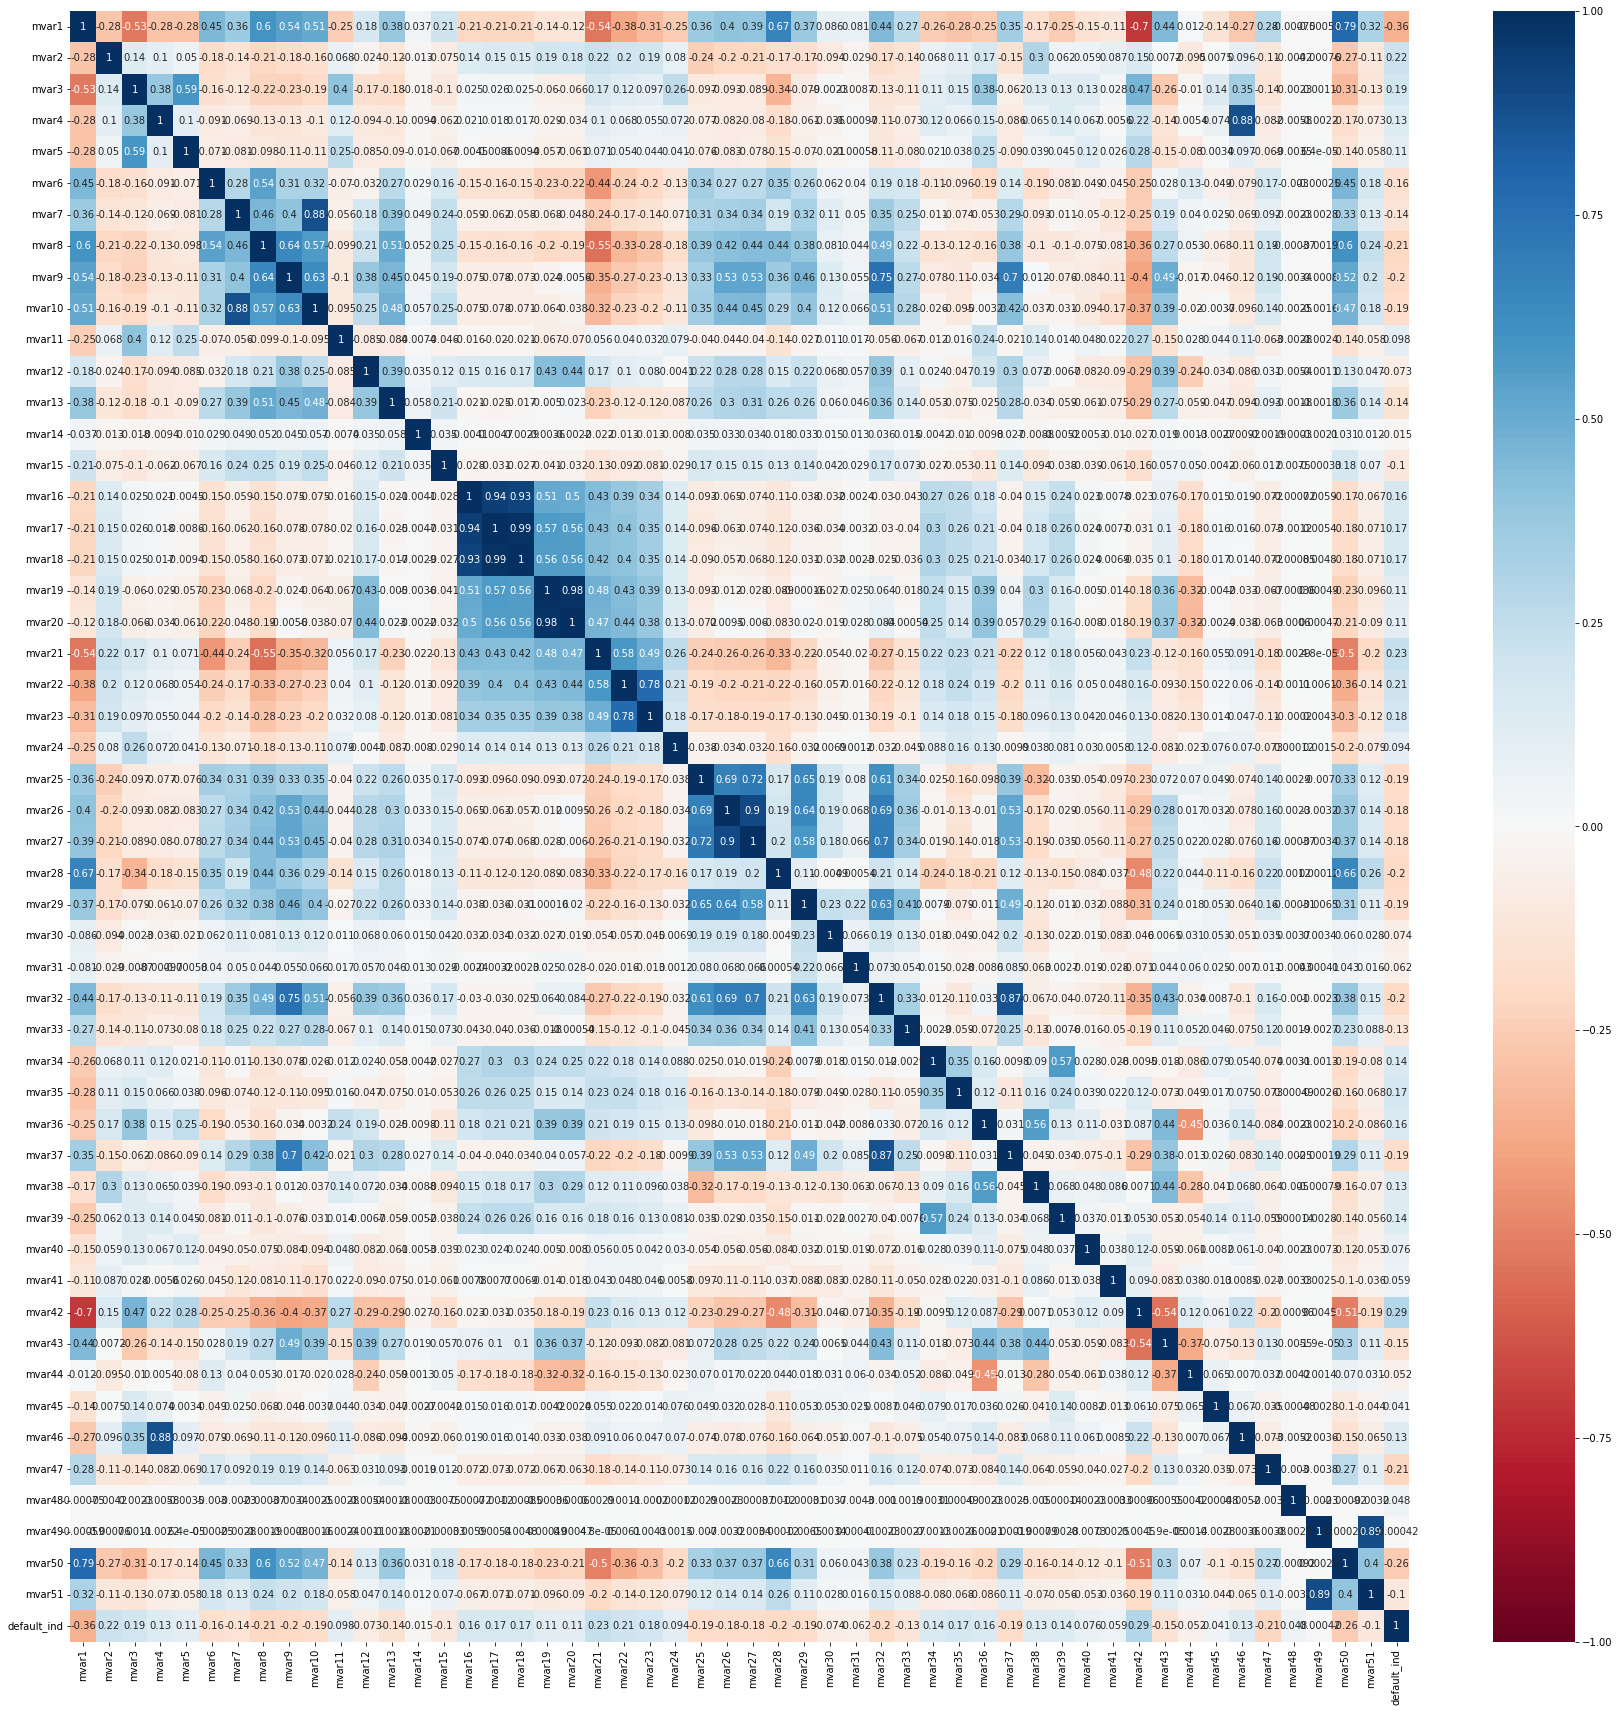

In [138]:
# Performance is not so good , so we are going to check the corr matrix
plt.figure(1,figsize=(30,30))
sns.heatmap(median_train.drop(['application_key'],axis=1,inplace=False).corr() ,cmap='RdBu',annot=True, vmax=1,vmin=-1)

In [ ]:
# Code copied from the last notebook-1

In [28]:
null_vals = np.array(list( [i,transformed_train_df[i].isnull().sum()] for i in transformed_train_df.columns if transformed_train_df[i].isnull().sum() > 20000))
print(null_vals)

[['mvar11' '46717']
 ['mvar15' '33519']
 ['mvar21' '23462']
 ['mvar22' '30668']
 ['mvar23' '42311']
 ['mvar30' '37988']
 ['mvar31' '58539']
 ['mvar35' '34868']
 ['mvar40' '65070']
 ['mvar41' '57264']
 ['mvar45' '45920']
 ['mvar46' '23603']]


In [133]:
train_df1 = transformed_train_df.drop(null_vals[:,0], inplace = False,axis = 1) # Dropping all columns with more than 20k null vals
len(train_df1[~train_df1.isnull().any(axis=1)]) # atlast we got 52k rows without any null vals
null_filtered_train_df1 = train_df1[~train_df1.isnull().any(axis=1)]

# creating train dataset
null_filtered_train_df = null_filtered_train_df1.drop(['default_ind','application_key'] , axis = 1, inplace = False )
Y_null_fil = null_filtered_train_df1['default_ind'] 

null_filtered_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52617 entries, 0 to 82999
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mvar1   52617 non-null  float64
 1   mvar2   52617 non-null  float64
 2   mvar3   52617 non-null  float64
 3   mvar4   52617 non-null  float64
 4   mvar5   52617 non-null  float64
 5   mvar6   52617 non-null  float64
 6   mvar7   52617 non-null  float64
 7   mvar8   52617 non-null  float64
 8   mvar9   52617 non-null  float64
 9   mvar10  52617 non-null  float64
 10  mvar12  52617 non-null  float64
 11  mvar13  52617 non-null  float64
 12  mvar14  52617 non-null  float64
 13  mvar16  52617 non-null  float64
 14  mvar17  52617 non-null  float64
 15  mvar18  52617 non-null  float64
 16  mvar19  52617 non-null  float64
 17  mvar20  52617 non-null  float64
 18  mvar24  52617 non-null  float64
 19  mvar25  52617 non-null  float64
 20  mvar26  52617 non-null  float64
 21  mvar27  52617 non-null  float64
 22

In [26]:
# training with the null_filtered dataset

# ['mvar16','mvar17','mvar20','mvar23','mvar7','mvar46','mvar9','mvar23','mvar27','mvar9','mvar51']

X_val_less_col = X_full.drop(['mvar7','mvar51'], inplace = False,axis = 1)
X_test_null_fil = X_test.drop(['mvar7','mvar51'], inplace = False,axis = 1)

In [19]:

# columns transformation
null_filtered_train , x_val_null_fil = scale_cols( null_filtered_train_df,X_val_less_col,trans=MinMaxScaler() )
Y_predicted = check_model( RandomForestClassifier(max_depth=25,n_estimators = 20), null_filtered_train , Y_null_fil , X_val_less_col, Y_full, X_test_null_fil )

NameError: name 'null_filtered_train_df' is not defined

In [27]:
# Not performing well
# So, Instead of training with only 52k rows , we are dropping the col in the original dataset and training the model 

X_train_n,X_val_n,Y_train,Y_val = train_test_split( X_val_less_col,Y_full, test_size=0.2,shuffle=True)

#X_train_n , X_val_n = scale_cols( X_train_n , X_val_n , trans=MinMaxScaler() )
#X_train_null_fil ,  X_test_null_fil_1 = scale_cols(X_val_less_col,X_test_null_fil,trans=MinMaxScaler() ) 

X_train_n.head()

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar8,mvar9,mvar10,mvar11,...,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,mvar48,mvar49,mvar50
17968,1757.0,1.7015,0.000,0.0,0.000,64.0,1982.0,16121.000000,7500.0,5563.994846,...,94.73700,0.08824,26.0,0.28586,0.0,0.0,0,8.0,350.0,4.0
79034,1630.0,0.1301,3.267,0.0,0.000,0.0,66.0,34030.596329,28921.0,1972.000000,...,72.01657,0.15385,5.0,0.51533,0.0,0.0,0,12.0,591.0,4.0
23387,1894.0,0.0974,0.000,0.0,0.000,1015.0,7928.0,112916.000000,70700.0,5563.994846,...,72.01657,0.00000,29.0,0.89969,0.0,0.0,0,18.0,587.0,5.0
19410,1730.0,0.9333,4.831,0.0,2.480,488.0,547.0,9030.000000,12031.0,703.000000,...,72.01657,0.54545,6.0,0.76700,0.0,0.0,0,13.0,572.0,4.0
53454,1761.0,0.0000,1.887,0.0,1.887,861.0,4955.0,40382.000000,30154.0,460.000000,...,72.01657,0.13043,9.0,0.32282,0.0,0.0,1,2.0,652.0,4.0


In [28]:
# checking the model 
check_model(RandomForestClassifier(max_depth=25,n_estimators = 20),X_train_n, Y_train , X_val_n, Y_val, X_test_null_fil)
Y_predicted = check_model(RandomForestClassifier(max_depth=25,n_estimators = 20), X_val_less_col , Y_full , X_val_n, Y_val, X_test_null_fil)

 Accuracy of the model is : 0.7619879518072289
 F1 score of the model is : 0.49533784646825896
metrics matrix of the prediction : (array([0.78889216, 0.6412037 ]), array([0.90801187, 0.40353798]), array([0.84427102, 0.49533785]), array([11795,  4805], dtype=int64))
 Accuracy of the model is : 0.9839759036144579
 F1 score of the model is : 0.9715994020926756
metrics matrix of the prediction : (array([0.97881884, 0.99758825]), array([0.9990674 , 0.94693028]), array([0.98883947, 0.9715994 ]), array([11795,  4805], dtype=int64))


In [175]:
print(Y_predicted.shape,median_test['application_key'].shape)
Y_predicted = np.array(Y_predicted).astype(int)
df_predicted = pd.DataFrame({'application_key' : np.array(median_test['application_key']).astype(int), 'default_ind' : Y_predicted} ).set_index('application_key')
df_predicted.to_csv('phy_machans_3.csv')

(47000,) (47000,)


# Using PCA to reduce Dimensions

In [91]:
X_train , X_val , Y_train , Y_val = train_test_split(X_full , Y_full , test_size=0.2 , shuffle = True)
#X_train = X_train.drop(['mvar48'] , axis=1,inplace=False)
#X_val = X_val.drop(['mvar48'] , axis=1,inplace=False)

In [20]:
# Function to get data with reduced dimensions :

def use_PCA(df1=X_train,df2=X_val,final_dim=40,scaling=StandardScaler() ):

    scaled_train_df , scaled_test_df = scale_cols(df_train=df1,df_test=df2,trans=scaling)
    pca = PCA(n_components=final_dim)

    # fitting the pca model with the train data
    pca.fit(scaled_train_df)

    # getting the output
    pca_train = pca.transform(scaled_train_df)
    pca_test = pca.transform(scaled_test_df)

    # converting to DataFrame:
    pca_train = pd.DataFrame(pca_train)
    pca_test = pd.DataFrame(pca_test)

    return pca_train , pca_test

In [40]:
# getting the reduced dim dataset
pca_train , pca_val =  use_PCA(final_dim=40)
pca_train_full , pca_test = use_PCA(final_dim=40,df1=X_full, df2=X_test)
pca_train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83000 entries, 0 to 82999
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       83000 non-null  float64
 1   1       83000 non-null  float64
 2   2       83000 non-null  float64
 3   3       83000 non-null  float64
 4   4       83000 non-null  float64
 5   5       83000 non-null  float64
 6   6       83000 non-null  float64
 7   7       83000 non-null  float64
 8   8       83000 non-null  float64
 9   9       83000 non-null  float64
 10  10      83000 non-null  float64
 11  11      83000 non-null  float64
 12  12      83000 non-null  float64
 13  13      83000 non-null  float64
 14  14      83000 non-null  float64
 15  15      83000 non-null  float64
 16  16      83000 non-null  float64
 17  17      83000 non-null  float64
 18  18      83000 non-null  float64
 19  19      83000 non-null  float64
 20  20      83000 non-null  float64
 21  21      83000 non-null  float64
 22

In [65]:
pca_train.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,-3.087032,1.772085,-0.700476,2.007447,0.460169,2.017133,0.006079,-1.263261,1.534751,-0.708480,...,-1.380588,0.921492,0.386957,-0.203989,0.255986,-0.811175,0.054159,0.254322,-0.021080,0.329341
1,7.558132,0.050288,0.376094,1.168242,1.806136,0.837376,0.529978,-0.481385,-0.253303,0.033760,...,-0.303756,0.125899,0.023704,0.149038,-0.068424,0.629782,0.085987,-0.003430,0.278783,-0.463097
2,5.122411,-0.272941,1.185176,-2.167136,-0.957288,-0.317894,-0.976238,-0.791090,-1.084539,0.353055,...,0.093559,-0.410301,0.582867,-0.086698,0.248078,-0.363954,-0.018667,-0.050963,0.131829,-0.343970
3,-2.176616,-1.894217,-0.325812,-0.904503,-0.724483,0.252440,-0.695499,0.961541,-0.227863,0.057047,...,0.296803,0.250526,-0.124892,-0.016866,-0.173651,-0.069956,-0.059415,0.031550,0.354204,-0.059869
4,-1.871312,-0.356606,-1.495028,1.498946,-0.856144,-0.189305,0.330368,-0.368391,-0.233028,0.321075,...,0.084798,-0.140605,0.174293,0.671424,0.222005,0.377335,0.007263,0.045771,-0.195968,-0.013898


<AxesSubplot:>

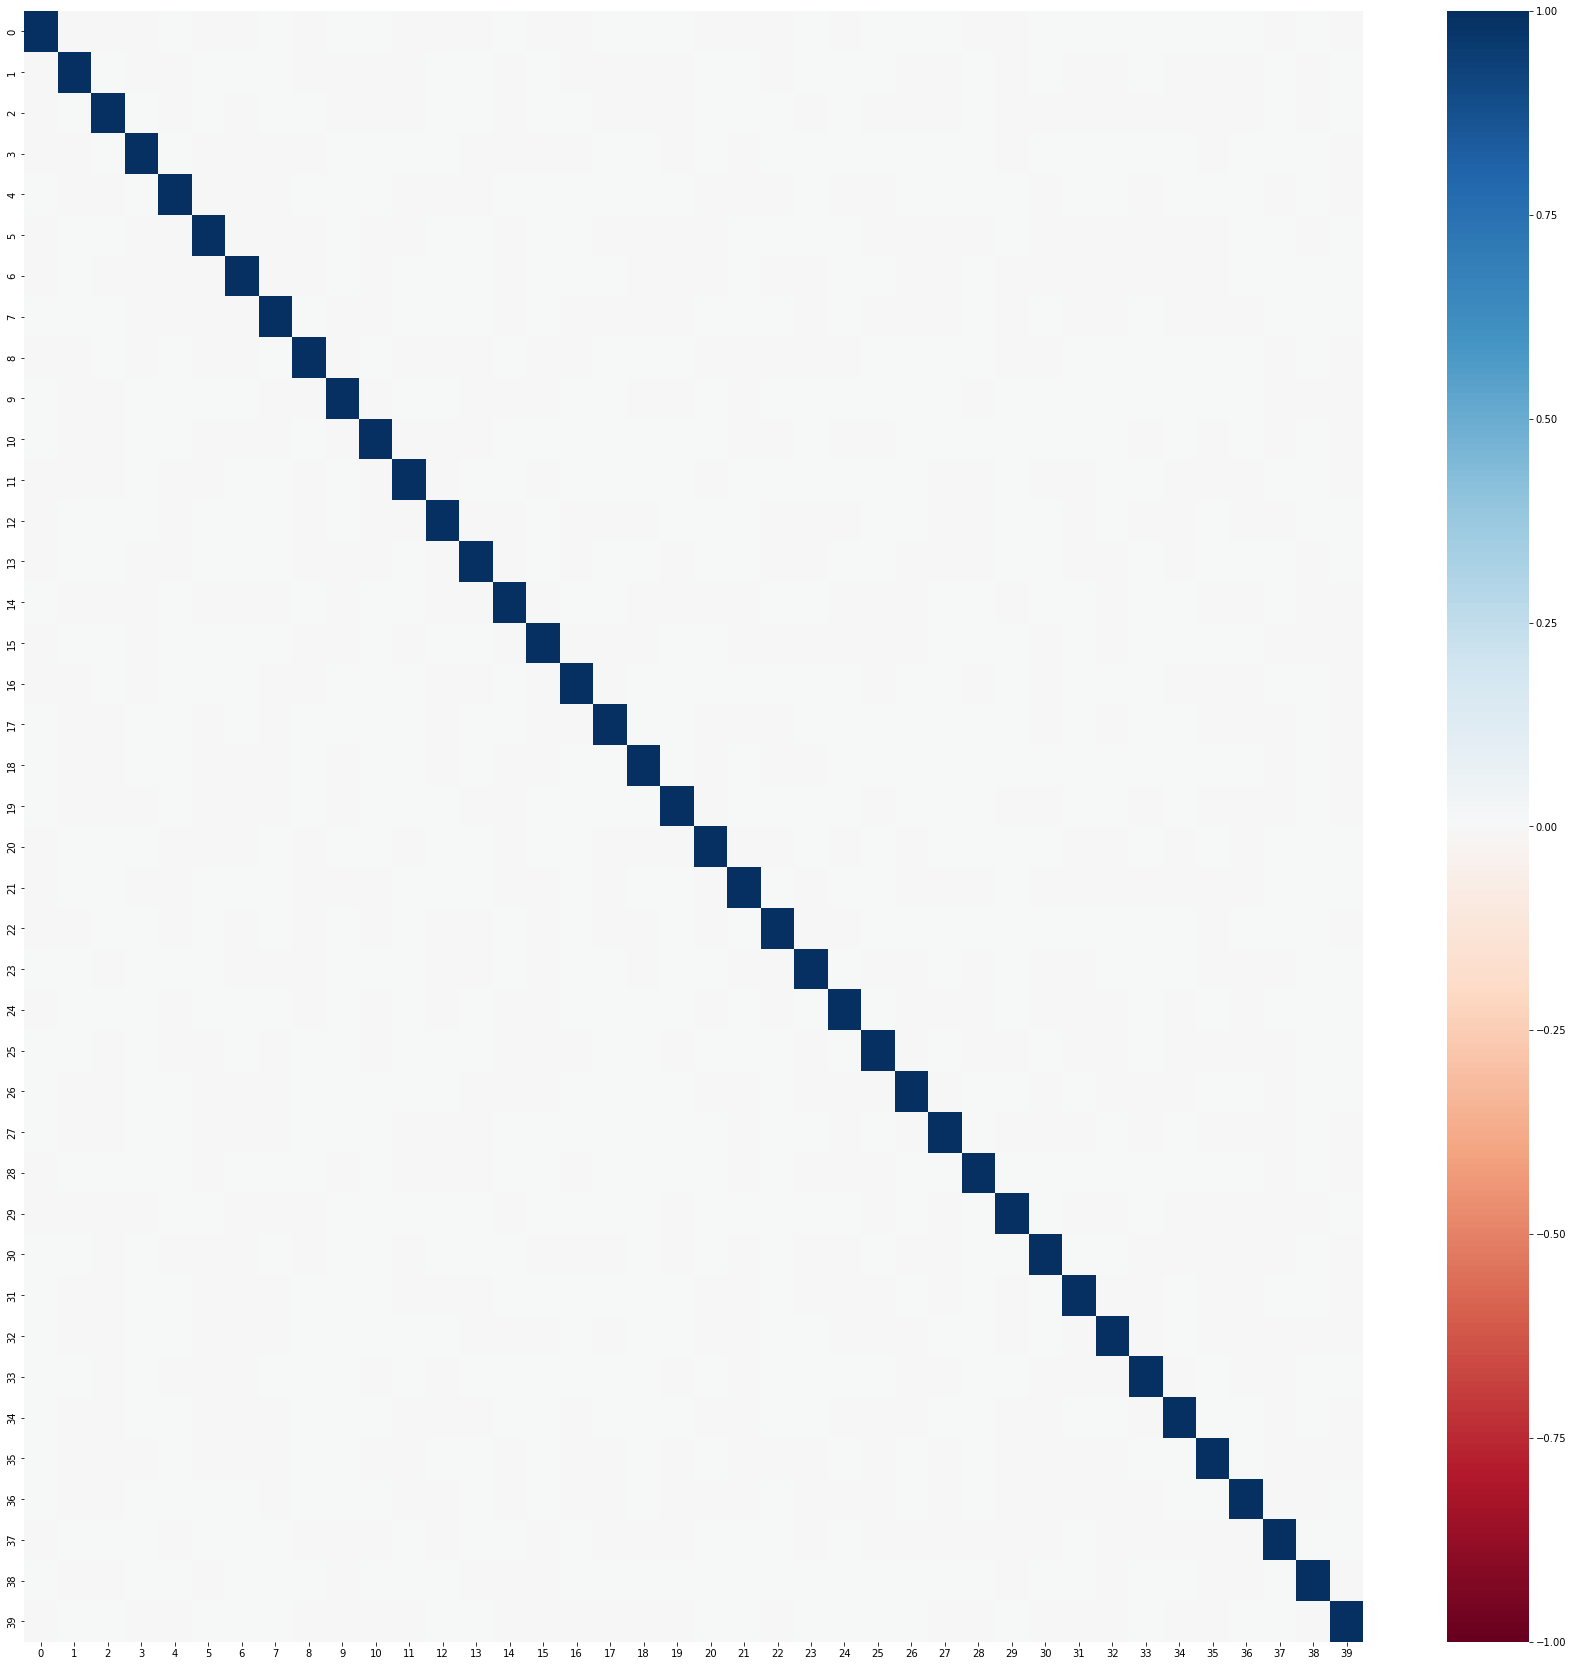

In [95]:
# Now checking the Heatmap
plt.figure(47, figsize=(30,30))
sns.heatmap(pca_train.corr(),cmap='RdBu',annot=False, vmax=1,vmin=-1)

In [42]:
check_model(model=MLPClassifier(hidden_layer_sizes=(60,4) , verbose = 5 , max_iter=100),x_train=pca_train,y_train=Y_train,x_val=pca_val,y_val=Y_val,x_test=pca_test)
#Y_predicted = check_model(model=RandomForestClassifier(n_estimators=25,max_depth=20),x_train=pca_train_full,y_train=Y_full,x_val=pca_val,y_val=Y_val,x_test=pca_test)

Iteration 1, loss = 0.50902523
Iteration 2, loss = 0.49496522
Iteration 3, loss = 0.49184686
Iteration 4, loss = 0.49020394
Iteration 5, loss = 0.48865073
Iteration 6, loss = 0.48752613
Iteration 7, loss = 0.48660388
Iteration 8, loss = 0.48540870
Iteration 9, loss = 0.48463639
Iteration 10, loss = 0.48386951
Iteration 11, loss = 0.48291685
Iteration 12, loss = 0.48214236
Iteration 13, loss = 0.48195973
Iteration 14, loss = 0.48102377
Iteration 15, loss = 0.48043163
Iteration 16, loss = 0.47986114
Iteration 17, loss = 0.47912296
Iteration 18, loss = 0.47834050
Iteration 19, loss = 0.47789640
Iteration 20, loss = 0.47759501
Iteration 21, loss = 0.47690476
Iteration 22, loss = 0.47632903
Iteration 23, loss = 0.47585431
Iteration 24, loss = 0.47521993
Iteration 25, loss = 0.47509573
Iteration 26, loss = 0.47476488
Iteration 27, loss = 0.47405507
Iteration 28, loss = 0.47380805
Iteration 29, loss = 0.47332775
Iteration 30, loss = 0.47298204
Iteration 31, loss = 0.47271412
Iteration 32, los

c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


array([0., 0., 0., ..., 1., 0., 0.])

# Using Ensemble Method

In [44]:
def n_model_prediction( models=[RandomForestClassifier(n_estimators=25,max_depth=20) , GradientBoostingClassifier(n_estimators=25,max_depth=20) ] 
, weighted = True , df1 = X_train_ss , df2 = X_val_ss , y1 = Y_train , y2 = Y_val , test = False , df_test = X_test_mm , criteria = f1_score , thresh = 0.5):

    scores = []
    y_pred = np.zeros(shape = (len(models) , df2.shape[0]) ) # creating the prediction matrix
    final_pred = np.zeros(shape=(df2.shape[0])) # used in final prediciton array

    if test :
        y_test = np.zeros(shape = (len(models) , df_test.shape[0]) )
        y_test_f = np.zeros(shape = (df_test.shape[0]) )

    for i,model in enumerate(models) : # iterating through all models
        model.fit(df1,y1)
        y_pred[i] = model.predict(df2)
        scores.append( criteria(y2,y_pred[i]) ) # appending the score of each model
        print(f' model - {i} finished training ')

        if test:
            y_test[i] = model.predict(df_test)
    
    scores = np.array(scores) / sum(scores)
    
    print(f' predicted array shape :{y_pred.shape} and the')
    ''' test - 1 '''
    
    if weighted:  # as here we are doing the weighted scores , we will only do it if this param is true
        for i,prediction in enumerate(y_pred) : 
            final_pred += scores[i]*prediction

        print(f' final predicted array shape : {len(final_pred)} ') 
        ''' test # - 2 '''
        
        if test :
            for i,prediction in enumerate(y_test) : 
                y_test_f += scores[i]*prediction
    
    else :
        final_pred = np.sum(y_pred , axis=0)/len(models)
    
        print(f' final predicted array shape : {len(final_pred)} ') 
        ''' test # - 2 '''

        if test:
            y_test_f = np.sum(y_test , axis=0)/len(models)
    
    # getting the final prediction auc score with the weights
    print(f' roc_auc of the weights is : {auc_score(y2,final_pred)} ')

    # changing the weights to binary with the threshold
    final_pred_b = list( map(lambda x: 1 if x>= thresh else 0 , list(final_pred) ) )

    print(f' f1 of the final output with the threshold : "{thresh}" is : {criteria(y2,final_pred_b)} ')
    print(f' f1_score of the models : {scores} ')

    if test:
        y_test_b = list( map(lambda x: 1 if x>= thresh else 0, list(y_test_f) ) )
        #print( max(y_test_f) )
        return final_pred , y_pred , scores , y_test_f , y_test_b
    else:
        # return final_pred , y_pred , scores
        return None

In [45]:
models_list = [ HistGradientBoostingClassifier(max_depth=20) , MLPClassifier(hidden_layer_sizes=(60,4),max_iter=100,verbose=5)] #, GradientBoostingClassifier(max_depth=20,n_estimators=20)  ] 
cumulative_scores,_,_,Y_scores ,Y_predicted = n_model_prediction(models = models_list , thresh = 0.45 , test = True )

 model - 0 finished training 
Iteration 1, loss = 0.92585666
Iteration 2, loss = 0.81205644
Iteration 3, loss = 0.73013874
Iteration 4, loss = 0.66234212
Iteration 5, loss = 0.61490030
Iteration 6, loss = 0.58139047
Iteration 7, loss = 0.55734444
Iteration 8, loss = 0.54029237
Iteration 9, loss = 0.52758633
Iteration 10, loss = 0.51832467
Iteration 11, loss = 0.51107711
Iteration 12, loss = 0.50551350
Iteration 13, loss = 0.50140887
Iteration 14, loss = 0.49808379
Iteration 15, loss = 0.49543162
Iteration 16, loss = 0.49326549
Iteration 17, loss = 0.49160405
Iteration 18, loss = 0.49035289
Iteration 19, loss = 0.48903149
Iteration 20, loss = 0.48809051
Iteration 21, loss = 0.48744083
Iteration 22, loss = 0.48651859
Iteration 23, loss = 0.48593292
Iteration 24, loss = 0.48529627
Iteration 25, loss = 0.48477227
Iteration 26, loss = 0.48440977
Iteration 27, loss = 0.48391258
Iteration 28, loss = 0.48366594
Iteration 29, loss = 0.48325965
Iteration 30, loss = 0.48277215
Iteration 31, loss 

c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [147]:
cumulative_scores,_,_,Y_scores ,Y_predicted = n_model_prediction(models = models_list , thresh = 0.45 , test = True )

 model - 0 finished training 
 model - 1 finished training 
 predicted array shape :(2, 16600) and the
 final predicted array shape : 16600 
 roc_auc of the weights is : 0.49999122062505763 
 f1 of the final output with the threshold : "0.45" is : 0.009805924412665985 
 f1_score of the models : [0. 1.] 


In [46]:
def check_metrics( y_truth=Y_val,scores=cumulative_scores,thresholds=[0.2,0.3,0.4,0.45,0.48,0.5,0.55,0.58,0.6] ):
    for thresh in thresholds :
        y_pred = list( map(lambda x: 1 if x>= thresh else 0, list(scores) ) )
        print(f'f1_score for the threshold {thresh} is {f1_score(y_truth,y_pred):.3f}')

check_metrics()

f1_score for the threshold 0.2 is 0.548
f1_score for the threshold 0.3 is 0.548
f1_score for the threshold 0.4 is 0.548
f1_score for the threshold 0.45 is 0.548
f1_score for the threshold 0.48 is 0.548
f1_score for the threshold 0.5 is 0.516
f1_score for the threshold 0.55 is 0.477
f1_score for the threshold 0.58 is 0.477
f1_score for the threshold 0.6 is 0.477


In [47]:
# Good threshold found by the check_metrics func:
print( max(Y_scores) )
Y_predicted_1 = list( map(lambda x: 1 if x >= 0.45 else 0, list(Y_scores) ) )

0.9999999999999998


In [48]:
print(max(Y_predicted_1))

1


In [47]:
# converting to a csv file

df_predicted = pd.DataFrame({'application_key' : np.array(median_test['application_key']).astype(int), 'default_ind' : Y_predicted} ).set_index('application_key')
df_predicted.to_csv('phy_machans_15.csv')

# Filling columns with null filtered df

In [49]:
train_df1 = transformed_train_df.drop(most_null_vals[:,0], inplace = False,axis = 1) # Dropping all columns with more than 20k null vals
len(train_df1[~train_df1.isnull().any(axis=1)]) # atlast we got 52k rows without any null vals
null_filtered_train_df1 = train_df1[~train_df1.isnull().any(axis=1)]
null_filtered_train_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52617 entries, 0 to 82999
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   application_key  52617 non-null  float64
 1   mvar1            52617 non-null  float64
 2   mvar2            52617 non-null  float64
 3   mvar3            52617 non-null  float64
 4   mvar4            52617 non-null  float64
 5   mvar5            52617 non-null  float64
 6   mvar6            52617 non-null  float64
 7   mvar7            52617 non-null  float64
 8   mvar8            52617 non-null  float64
 9   mvar9            52617 non-null  float64
 10  mvar10           52617 non-null  float64
 11  mvar12           52617 non-null  float64
 12  mvar13           52617 non-null  float64
 13  mvar14           52617 non-null  float64
 14  mvar16           52617 non-null  float64
 15  mvar17           52617 non-null  float64
 16  mvar18           52617 non-null  float64
 17  mvar19      

In [84]:
train_df2 = transformed_train_df.drop(most_null_vals[:,0] ,axis=1,inplace=False )
test_df2 = transformed_test_df.drop(most_null_vals[:,0] ,axis=1,inplace=False )

In [52]:
def fill_columns(df2=transformed_train_df,df1=null_filtered_train_df1,m1=KNeighborsClassifier(n_neighbors=15,weights='distance'),
m2=KNeighborsRegressor(n_neighbors=15,weights='distance'),df_test=transformed_test_df, y_type= ['median']*13 + ['mode']*5 + ['median']*8 + ['mode']*1 + ['median']*12 + ['mode']*2 + ['median']*4  ):
    
    df_train = df1.drop(['application_key','default_ind'] , axis=1, inplace=False) # train dataset will be used for raining the model
    col_list = df_train.columns.values.tolist() # getting all the columns as a list

    df_test_target = df_test.copy()

    df_predict = df2.drop(['application_key','default_ind'] + list(most_null_vals[:,0]) , axis=1, inplace=False) # prediction dataset
    df_test = df_test.drop(['application_key'] + list(most_null_vals[:,0]), axis=1, inplace=False) # test column

    # In this df we will fill the columns with null vals with the predicted values

    df_target = df2.copy() 
    

    for i,col in enumerate(col_list):

        model = m1 if y_type[i] == 'mode' else m2
        
        df_train_col = df_train.drop([col], axis=1, inplace=False)
        y_train_col = df_train[col] # For training the model

        df_predict_col = df_predict[df_predict[col].isnull()].drop([col] , axis=1 , inplace = False)
        df_test_col = df_test[df_test[col].isnull()].drop([col] , axis=1 , inplace = False)

        if len(df_predict_col) != 0 : # We need to predict only if the null vals are there

            df_predict_col = df_predict_col.fillna(df_predict_col.median() , inplace=False) # In the prediction dataset , if any other columns have nan vals , they will be filled with median vals
            null_col_list_pred =  set(df_predict_col.columns[df_predict_col.isna().any()].tolist())

            # For test dataset
            df_test_col = df_test_col.fillna(df_test_col.median() , inplace=False)
            null_col_list_test = set(df_test_col.columns[df_test_col.isna().any()].tolist() )

            # union of two sets
            null_col_list = list(null_col_list_test.union(null_col_list_pred))


            if len(null_col_list) != 0: # For removing col containing only Nan vals
                df_test_col = df_test_col.drop(null_col_list , axis=1 , inplace=False)
                df_predict_col = df_predict_col.drop(null_col_list , axis=1 , inplace=False)
                df_train_col = df_train_col.drop(null_col_list , axis=1 , inplace=False)
            
            # Model training :
            model.fit(df_train_col, y_train_col)
            Y_pred = model.predict(df_predict_col)
            Y_pred_test = model.predict(df_test_col)

            #print(len(Y_pred_test),len(Y_pred))
            df_target.loc[df_target[col].isna(),col] = Y_pred
            df_test_target.loc[df_test_target[col].isna(),col] = Y_pred_test
            #print(Y_pred)
            #break
    
    return df_target ,  df_test_target
    


In [53]:
train_knn_filled , test_knn_filled = fill_columns()

In [54]:
len(test_knn_filled.columns.values.tolist())

52

In [55]:
median_train_knn = train_knn_filled.fillna( train_knn_filled.median() , inplace=False)
median_test_knn = test_knn_filled.fillna( train_knn_filled.median() , inplace=False)

#only use this if using mode
#median_train = median_train.fillna( median_train.median() , inplace=False )
#median_test = median_test.fillna( median_train.median() , inplace=False )
#'''
max(median_train_knn['mvar14']) # max of salary
median_train_knn , median_test_knn = clear_outliers(df1=median_train_knn,df2=median_test_knn,sigma=3,lower=0)

In [56]:
# Creating a dataset to validate model

Y_full = median_train_knn['default_ind']
X_full = median_train_knn.drop(['default_ind' , 'application_key' , 'mvar51','mvar40'], axis = 1, inplace = False)

X_test = median_test_knn.drop(['application_key','mvar51','mvar40'],inplace= False,axis=1)

X_train , X_val , Y_train , Y_val = train_test_split(X_full , Y_full , test_size=0.2 , shuffle = True)

X_train_knn , X_val_knn = scale_cols( df_train=X_train,df_test=X_val,trans=MinMaxScaler() )
X_full_knn , X_test_knn = scale_cols( df_train=X_full,df_test=X_test,trans=MinMaxScaler() )

In [58]:
models_list = [ RandomForestClassifier(max_depth=20,n_estimators=20) , HistGradientBoostingClassifier(max_depth=20) ] 

cumulative_scores,_,_,Y_scores ,Y_predicted = n_model_prediction( models=models_list, weighted = True , df1 = X_train_knn , df2 = X_val_knn , y1 = Y_train 
,y2 = Y_val , test = True , df_test = X_test_knn , criteria = f1_score , thresh = 0.45)

 model - 0 finished training 
 model - 1 finished training 
 predicted array shape :(2, 16600) and the
 final predicted array shape : 16600 
 roc_auc of the weights is : 0.6852405469101814 
 f1 of the final output with the threshold : "0.45" is : 0.5401050788091067 
 f1_score of the models : [0.48778144 0.51221856] 


In [158]:
check_metrics( y_truth=Y_val,scores=cumulative_scores,thresholds=[0.2,0.3,0.4,0.45,0.48,0.5,0.55,0.58,0.6] )

f1_score for the threshold 0.2 is 0.552
f1_score for the threshold 0.3 is 0.504
f1_score for the threshold 0.4 is 0.504
f1_score for the threshold 0.45 is 0.504
f1_score for the threshold 0.48 is 0.493
f1_score for the threshold 0.5 is 0.486
f1_score for the threshold 0.55 is 0.445
f1_score for the threshold 0.58 is 0.445
f1_score for the threshold 0.6 is 0.445


In [155]:
print(max(Y_scores))
Y_predicted_1 = list( map(lambda x: 1 if x >= 0.45 else 0, list(Y_scores) ) )
df_predicted = pd.DataFrame({'application_key' : np.array(median_test_knn['application_key']).astype(int), 'default_ind' : Y_predicted} ).set_index('application_key')
df_predicted.to_csv('phy_machans_12.csv')

1.0
